# Feature Preprocessing

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

In [149]:
primary_key = ['dialog_id', 'speaker', 'da_tag', 'start_time', 'end_time']

## Load The Raw Features

### `Train`

In [128]:
text_train = pd.read_csv('../features/raw_train_text_features.csv', index_col=0)
speech_train = pd.read_csv('../features/raw_train_speech_features.csv', index_col=0)

### `Test`

In [129]:
text_test = pd.read_csv('../features/raw_test_text_features.csv', index_col=0)
speech_test = pd.read_csv('../features/raw_test_speech_features.csv', index_col=0)

## Filter "NaN"

First, visualize which features are taking NaN values.

In [142]:
speech_train

,dialog_id,speaker,da_tag,start_time,end_time,Min Pitch,Max Pitch,Mean Pitch,Sd Pitch,Min Intensity,Max Intensity,Mean Intensity,Sd Intensity,Speaking Rate,Jitter,Shimmer,HNR
26351,sw3000,A,%,70.29388,71.63819,0.097598,0.303433,0.273750,0.126608,0.882755,0.940564,0.945005,0.075539,0.142779,0.045159,0.070985,0.388680
5698,sw2109,A,%,267.14548,267.81420,0.124859,0.828162,0.435331,0.333985,0.927373,0.945247,0.944506,0.052112,0.143515,0.124188,0.288458,0.288253
27544,sw3047,A,%,348.36000,349.36564,0.085014,0.089852,0.083095,0.024536,0.883050,0.895534,0.901283,0.031897,0.143148,0.178147,0.139681,0.241005
22565,sw2847,B,%,366.11283,366.99661,0.321235,0.366787,0.321646,0.041314,0.925011,0.950798,0.956779,0.050193,0.108453,0.050183,0.101270,0.399500
23844,sw2876,B,%,28.45746,29.22207,0.311632,0.706303,0.349505,0.212820,0.935202,0.938434,0.952464,0.025642,0.125445,0.037897,0.073616,0.438817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33955,sw3324,B,x,240.35438,241.64000,0.170304,0.333345,0.202942,0.136991,0.913374,0.887518,0.889859,0.020756,0.036902,0.101071,0.171891,0.236375
1531,sw2028,B,x,389.64363,397.72000,NaN,NaN,NaN,NaN,0.017818,0.943801,0.917175,0.842325,0.005393,NaN,NaN,0.403484
53219,sw4572,A,x,218.07505,221.78331,NaN,NaN,NaN,NaN,0.864250,0.877509,0.872041,0.033651,0.012420,NaN,NaN,0.182791
10349,sw2248,A,x,329.88050,331.43676,0.130053,0.275143,0.207965,0.093123,0.904993,0.903608,0.896363,0.029821,0.030385,0.080894,0.219573,0.261561


In [150]:
na_counts = {}

for col in speech_train:
    if not col in primary_key:
        na_counts[col] = speech_train[col].isna().sum()

In [151]:
na_counts

{'Min Pitch': 4129,
 'Max Pitch': 4129,
 'Mean Pitch': 4129,
 'Sd Pitch': 4253,
 'Min Intensity': 0,
 'Max Intensity': 0,
 'Mean Intensity': 0,
 'Sd Intensity': 0,
 'Speaking Rate': 0,
 'Jitter': 4220,
 'Shimmer': 4505,
 'HNR': 243}

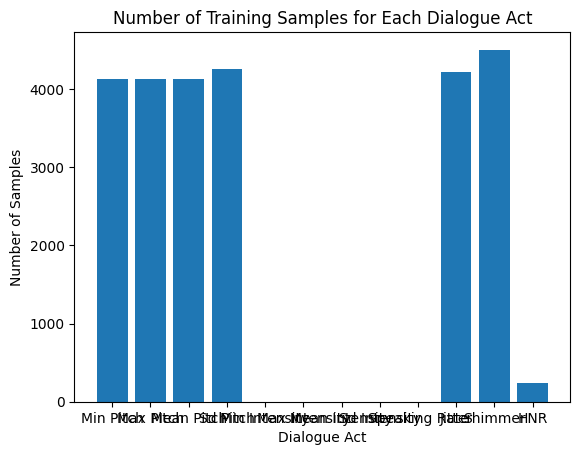

In [153]:
plt.bar(na_counts.keys(), na_counts.values())

plt.xlabel('Dialogue Act')
plt.ylabel('Number of Samples')
plt.title('Number of NaN For Each Feature')

plt.show()

In [132]:
# Count the columns/datags with NaN and deal accordingly

In [ ]:
#Correlation with length?

In [ ]:
# Correlation with DA?

## Distribute Classes

As shown below, the classes are very unbalanced. We downsample the larger classes and upsample the smaller classes.

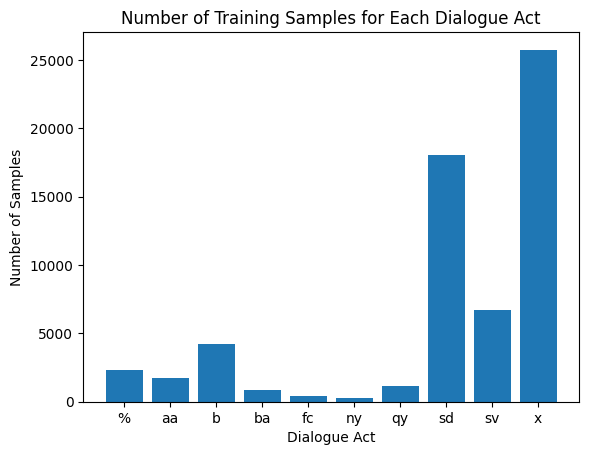

In [130]:
da_tags = []
num_samples = []

for row, item in text_train.groupby('da_tag'):
    da_tags.append(row)
    num_samples.append(len(item))

plt.bar(da_tags, num_samples)

plt.xlabel('Dialogue Act')
plt.ylabel('Number of Samples')
plt.title('Number of Training Samples for Each Dialogue Act')

plt.show()

In [115]:
def resample_df(df, n):
    sampled_dfs = []

    for row, item in df.groupby('da_tag'):
        sampled_dfs.append(item.sample(n=n, replace=True, random_state=1))

    return pd.concat(sampled_dfs)    

In [136]:
text_train = resample_df(text_train, 15000)
speech_train = resample_df(speech_train, 15000)

## Normalize

`min-max` feature scaling

Reference: https://www.geeksforgeeks.org/data-normalization-with-pandas/

In [123]:
def min_max_scale(df):
    for column in df.columns:
        if (not column in ['dialog_id', 'speaker', 'da_tag', 'start_time', 'end_time']):
            df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [138]:
min_max_scale(text_train)
min_max_scale(text_test)

In [134]:
min_max_scale(speech_train)
min_max_scale(speech_test)

## Write to CSV File

In [141]:
text_train.to_csv('../features/train_text_features.csv')
text_test.to_csv('../features/test_text_features.csv')